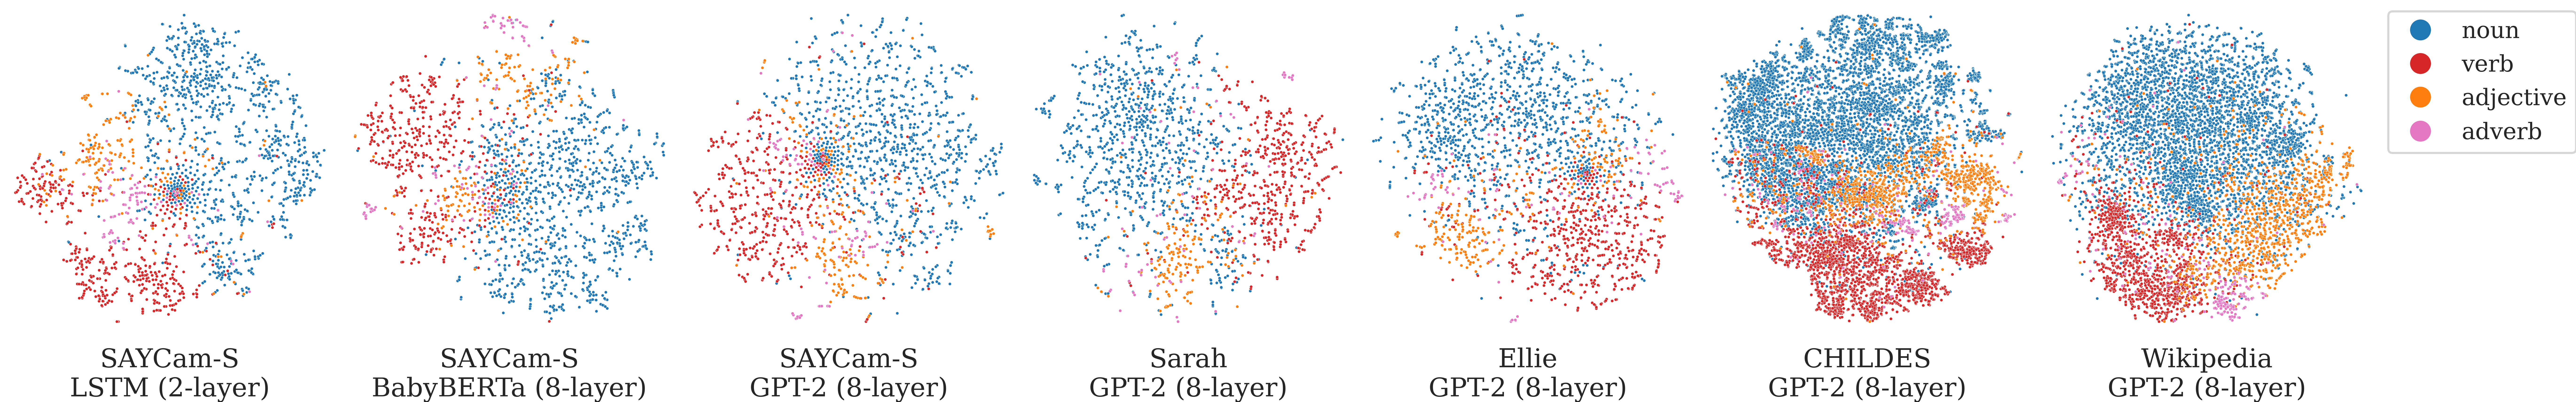

In [4]:
from pathlib import Path
import copy
import numpy as np
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from analysis_tools.plotting import palette


figsize = (8, 7)
paper_context = sns.plotting_context('paper')
paper_context.update({
    'font.size': 10.,
    'axes.labelsize': 10.,
    'axes.titlesize': 14.,
    'xtick.labelsize': 8.8,
    'ytick.labelsize': 8.8,
    'legend.fontsize': 8.8,
    'legend.title_fontsize': 9.6,
})
talk_context = sns.plotting_context('talk')
talk_context.update({
    'font.size': 12.,
    'axes.labelsize': 12.,
    'axes.titlesize': 16.,
    'xtick.labelsize': 10.8,
    'ytick.labelsize': 10.8,
    'legend.fontsize': 10.8,
    'legend.title_fontsize': 11.6,
})
unticked_relation_style = sns.axes_style('white')
unticked_relation_style.update({
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.right': False,
    'axes.spines.top': False,
})
ticked_relation_style = sns.axes_style('ticks')
ticked_relation_style.update({
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.right': False,
    'axes.spines.top': False,
})
heatmap_style = copy.copy(unticked_relation_style)
heatmap_style.update({
    'axes.spines.left': False,
    'axes.spines.bottom': False,
})
font = 'serif'
sns.set_theme(
    context=paper_context,
    style=unticked_relation_style,
    palette=sns.color_palette('tab20'),
    font=font,
    rc={
        'figure.figsize': figsize,
    }
)

plt.rcParams['figure.dpi'] = 800
plt.rcParams['savefig.dpi'] = 800
plt.rcParams["savefig.bbox"] = 'tight'
plt.rcParams["savefig.pad_inches"] = 0.


dataset_name_mapping = {
    "saycam": "SAYCam-S",
    "sarah": "Sarah",
    "ellie": "Ellie",
    "childes": "CHILDES",
    "wiki": "Wikipedia",
}

model_name_mapping = {
    'LSTM': 'LSTM',
    'GPT2': 'GPT-2',
    'BabyBERTa': 'BabyBERTa',
}


dataset_models = [
    ('saycam_yulu', 'LSTM 2-layers'),
    ('saycam_yulu', 'BabyBERTa 8-layers'),
    ('saycam_yulu', 'GPT2 8-layers'),
    ('sarah_yulu', 'GPT2 8-layers'),
    ('ellie_yulu', 'GPT2 8-layers'),
    ('childes_yulu', 'GPT2 8-layers'),
    ('wiki_yulu', 'GPT2 8-layers'),
]

image_paths = {
    dataset_model: Path('plots', *dataset_model, 'Embedding', 'All Syntactic Category', 't-SNE.png')
    for dataset_model in dataset_models
}

# Load the images
images = {
    dataset_model: Image.open(path)
    for dataset_model, path in image_paths.items()
}

# Number of images
num_images = len(images)

# Create a figure with subplots
large_layout = False
if large_layout:
    nrows, ncols = 2, 4
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 3, nrows * 3.5), gridspec_kw=dict(wspace=0., hspace=0.))
    used_axes, unused_axes = np.concatenate([axes[0,:3], axes[1]]), [axes[0,3]]
    legend_ax = unused_axes[0]
else:
    nrows, ncols = 1, 7
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 2, nrows * 2.5), gridspec_kw=dict(wspace=0., hspace=0.))
    used_axes, unused_axes = axes, []
    legend_ax = axes[-1]

# Display images with connected borders
for ax, (dataset_model, image) in zip(used_axes, images.items()):
    ax.imshow(image)
    ax.axis('on')  # Keep the axis on
    for spine in ax.spines.values():
        if False:
            # Set the color and width of all borders
            spine.set_color('black')
            spine.set_linewidth(2)
        else:
            spine.set_visible(False)
    ax.set_xticks([])  # Remove x ticks
    ax.set_yticks([])  # Remove y ticks
    dataset_name, model_name = dataset_model
    dataset_name = dataset_name_mapping[dataset_name.removesuffix("_yulu")]
    model_name = model_name.split()
    model_name = model_name_mapping[model_name[0]], '({})'.format(model_name[1].removesuffix("s"))
    model_name = ' '.join(model_name)
    ax.set_xlabel(f'{dataset_name}\n{model_name}')

for ax in unused_axes:
    ax.axis('off')

add_legend = True
if add_legend:
    handles = [
        mlines.Line2D(
            [], [], color=palette[label], marker='o', linestyle='None', markersize=7,
            label=label)
        for label in ['noun', 'verb', 'adjective', 'adverb']
    ]
    if large_layout:
        legend_ax.legend(handles=handles, loc='center', bbox_to_anchor=(.5, .5))
    else:
        legend_ax.legend(handles=handles, loc='upper left', bbox_to_anchor=(1., 1.))

# Display or save the figure
plt.tight_layout()
plt.savefig('tsne_syntactic_category.pdf', transparent=True)
plt.show()